In [4]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load Data
df = pd.read_csv('heart_disease.csv')

df.head(5)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [7]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [8]:
# Checking for missing values
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [9]:
# Checking the value in BMI column
df['BMI'].value_counts()

BMI
24.991591    1
37.993273    1
22.649772    1
28.736667    1
27.840845    1
            ..
28.630715    1
25.586614    1
25.246883    1
37.578752    1
25.111295    1
Name: count, Length: 9978, dtype: int64

In [17]:
# Checking the value in Heart Disease Status column
df['Heart Disease Status'].value_counts()

Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64

### Data cleaning

In [10]:
# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Convert categorical to numeric
label_encoders = {}
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'Heart Disease Status']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Encode target variable
le_target = LabelEncoder()
df['Heart Disease Status'] = le_target.fit_transform(df['Heart Disease Status'])

In [11]:
# Cell 4: Feature Engineering Function
def engineer_features(df):
    df['BMI_Category'] = pd.qcut(df['BMI'], q=3, labels=['Low', 'Medium', 'High']).astype('category')
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle', 'Senior']).astype('category')
    df['Cholesterol_Risk'] = np.where(df['Cholesterol Level'] > 240, 1, 0)
    
    # Encode newly created categorical features
    for column in ['BMI_Category', 'Age_Group']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    
    return df

In [12]:
# Cell 5: Exploratory Data Analysis Function
def exploratory_data_analysis(df):
    print("### Summary Statistics")
    print(df.describe())
    
    print("### Correlation Heatmap")
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()
    
    print("### Feature Distributions")
    for column in df.columns[:-1]:  # Exclude target
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=column, hue='Heart Disease Status', multiple="stack")
        plt.show()

In [13]:
# Cell 6: Model Training and Evaluation Function
def train_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
    
    return best_model, scaler

In [14]:
# Cell 7: Make Prediction Function
def predict_heart_disease(model, scaler, input_data, X_columns, label_encoders):
    input_df = pd.DataFrame([input_data])
    
    # Encode categorical columns
    for column in input_df.columns:
        if column in label_encoders or column in ['BMI_Category', 'Age_Group']:
            if column in label_encoders.keys():
                le = label_encoders[column]
                input_df[column] = le.transform(input_df[column])
            else:
                le = LabelEncoder()
                input_df[column] = le.fit_transform(input_df[column])
    
    # Ensure all columns match training data
    input_df = input_df.reindex(columns=X_columns, fill_value=0)
    
    # Scale the input
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)
    
    return prediction[0], prediction_proba[0][1]

### Summary Statistics
                Age       Gender  Blood Pressure  Cholesterol Level  \
count  10000.000000  10000.00000    10000.000000       10000.000000   
mean      49.296259      0.50220      149.757740         225.425577   
std       18.167567      0.50002       17.556265          43.510390   
min       18.000000      0.00000      120.000000         150.000000   
25%       34.000000      0.00000      134.000000         187.000000   
50%       49.000000      1.00000      150.000000         225.425577   
75%       65.000000      1.00000      165.000000         263.000000   
max       80.000000      1.00000      180.000000         300.000000   

       Exercise Habits       Smoking  Family Heart Disease      Diabetes  \
count      10000.00000  10000.000000          10000.000000  10000.000000   
mean           0.99350      0.514800              0.497500      0.495200   
std            0.82032      0.499806              0.500019      0.500002   
min            0.00000      0.000

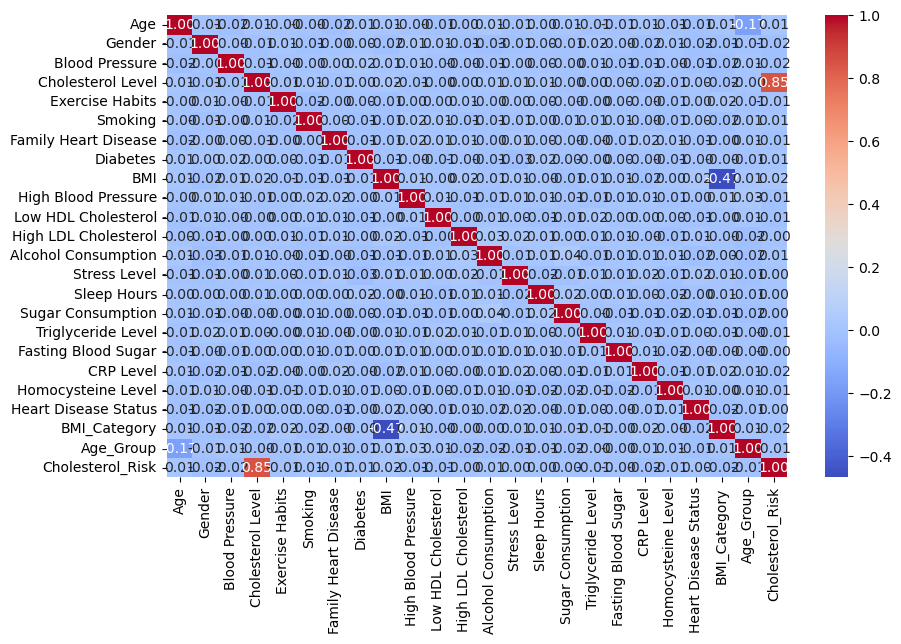

### Feature Distributions


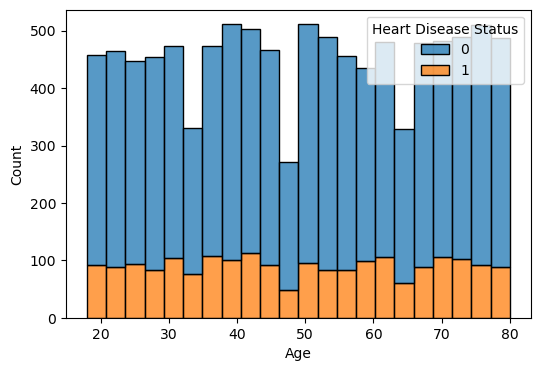

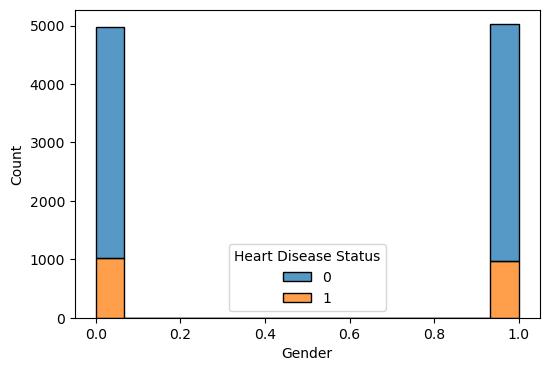

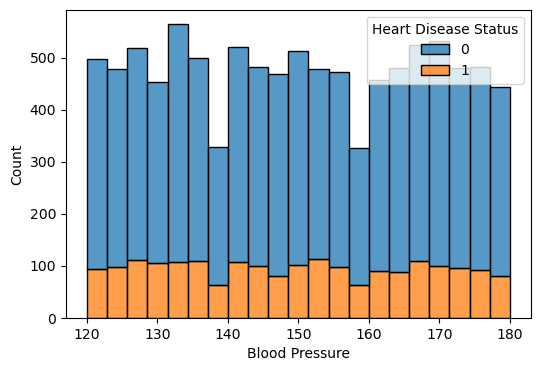

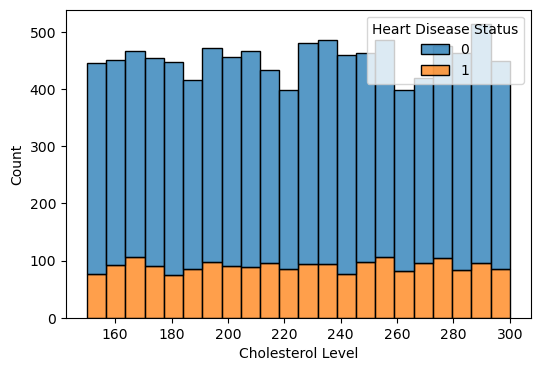

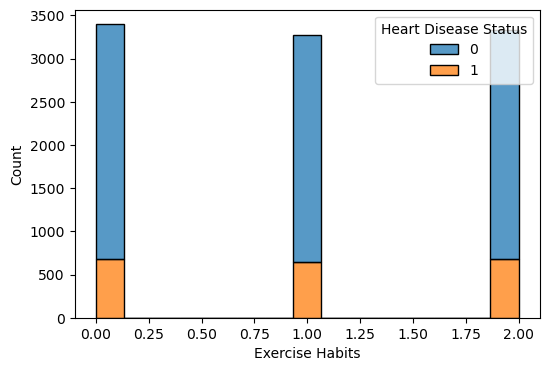

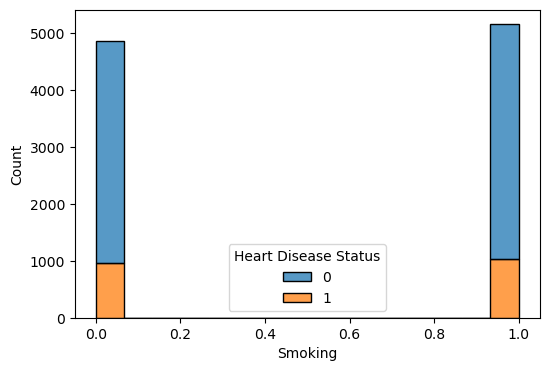

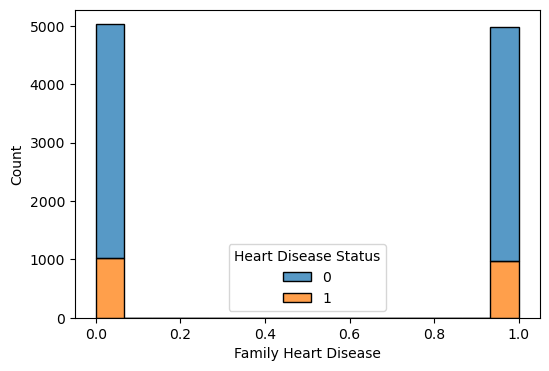

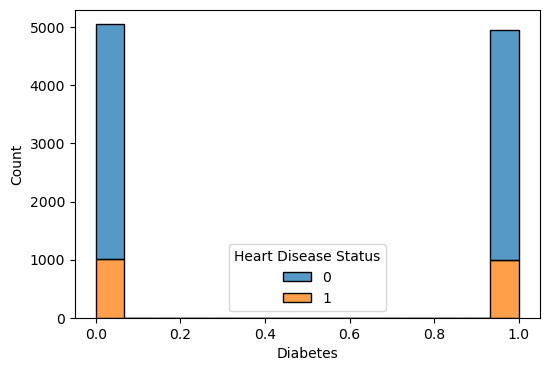

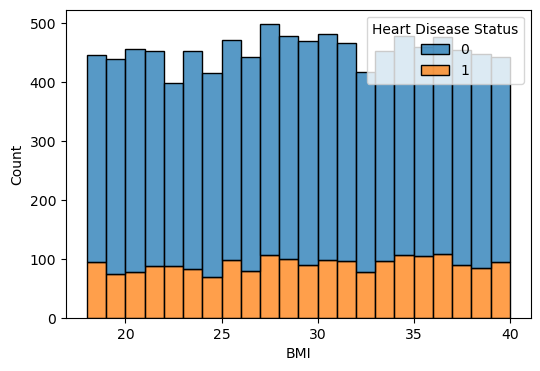

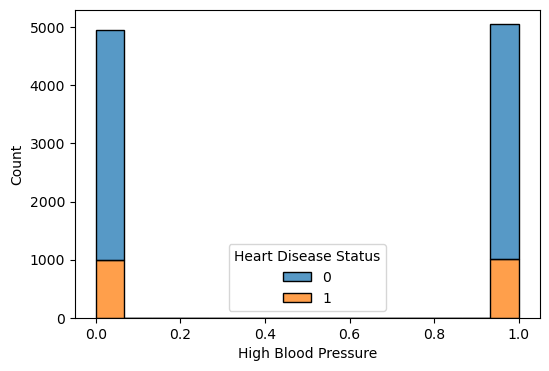

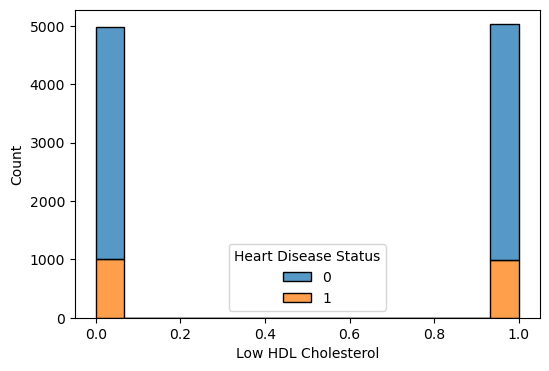

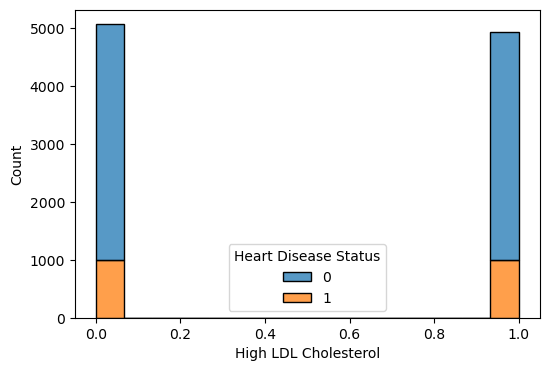

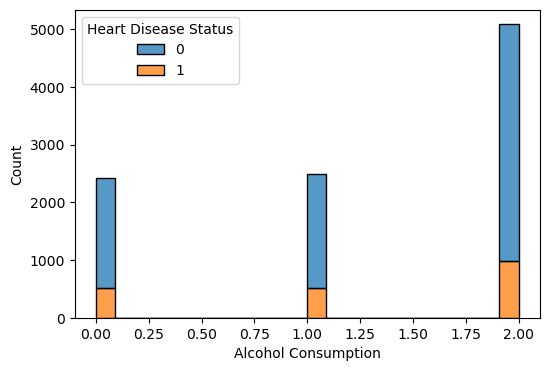

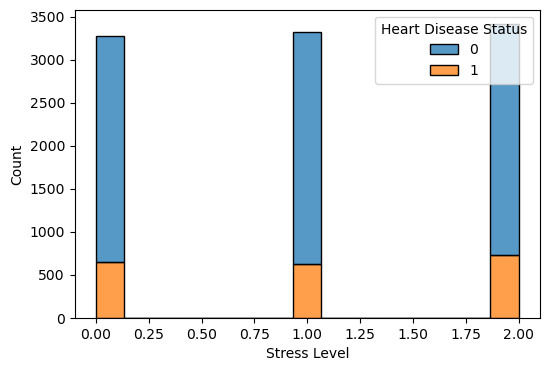

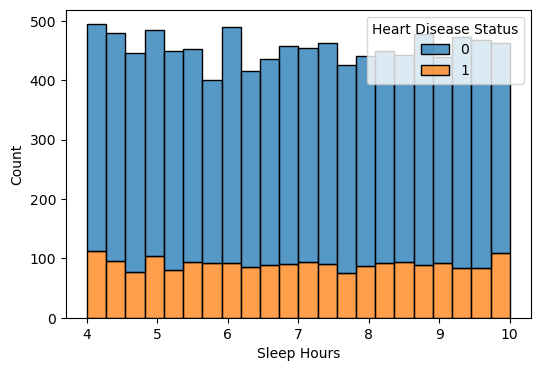

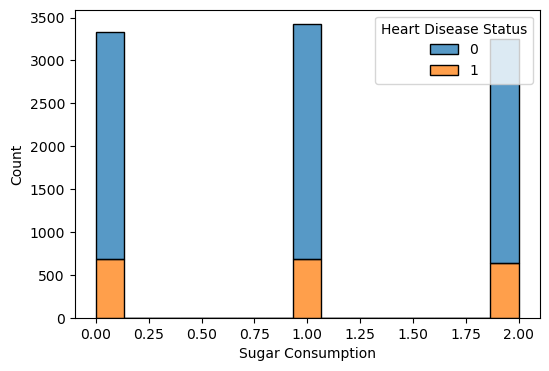

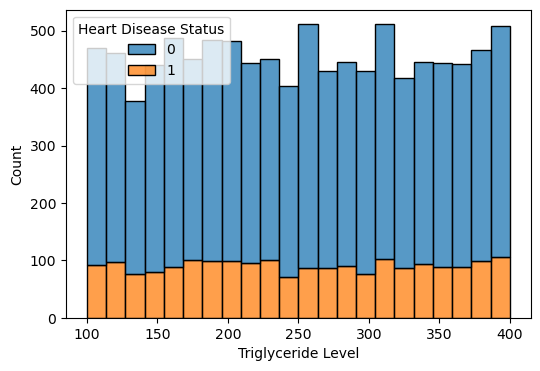

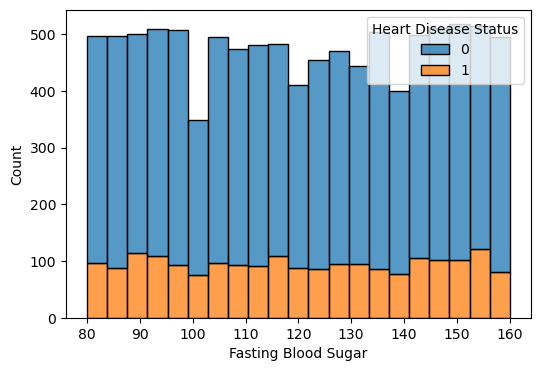

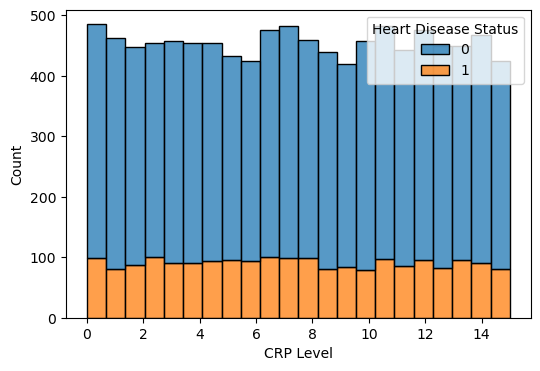

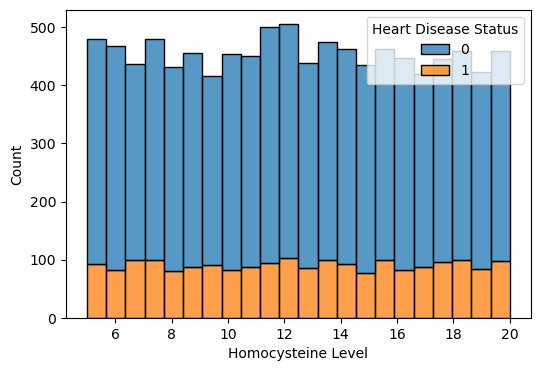

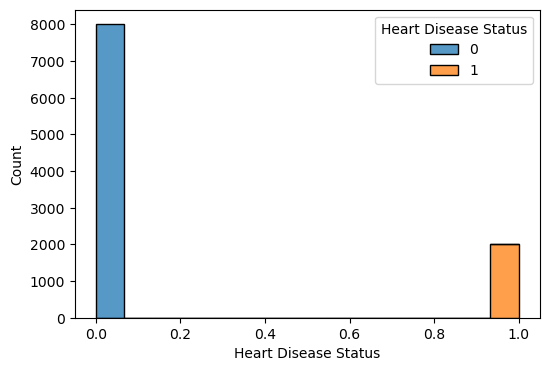

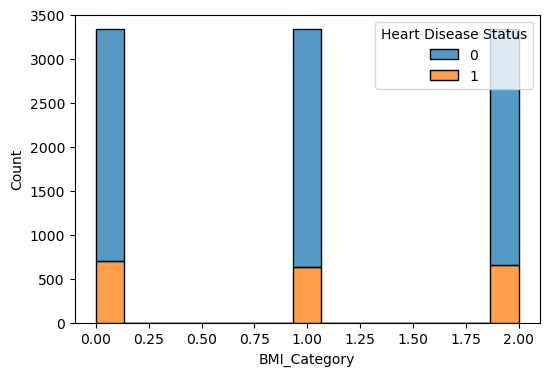

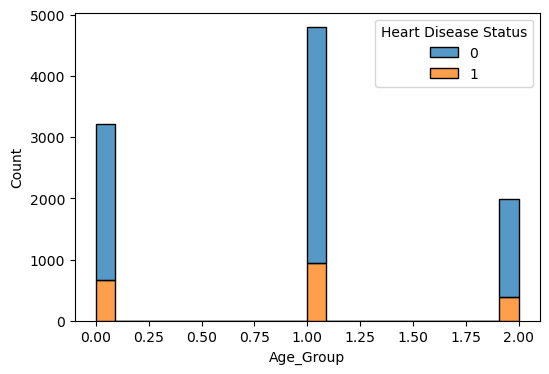

KeyboardInterrupt: 

In [15]:
# Cell 8: Execute the Model
# Apply feature engineering
df = engineer_features(df)

# EDA
exploratory_data_analysis(df)

# Prepare features and target
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

# Train and evaluate model
model, scaler = train_evaluate_model(X, y)

# Example prediction
sample_input = {
    'Age': 45,
    'Gender': 'Male',  # Adjust based on your dataset's categorical values
    'Blood Pressure': 120,
    'Cholesterol Level': 200,
    'BMI': 25,
    'Exercise Habits': 'Regular',  # Adjust based on your dataset
    'Smoking': 'No',  # Adjust based on your dataset
    'Family Heart Disease': 'No',  # Adjust based on your dataset
    'BMI_Category': 'Medium',  # Derived feature
    'Age_Group': 'Middle',  # Derived feature
    'Cholesterol_Risk': 0  # Derived feature
}
prediction, probability = predict_heart_disease(model, scaler, sample_input, X.columns, label_encoders)
print(f"Prediction: {'Yes' if prediction == 1 else 'No'}")
print(f"Probability of Heart Disease: {probability:.2f}")